# Find anagrams - Part 08
# Plot the differences in search spaces and look up comparisons
Mike Babb  
babb.mike@outlook.com

In [1]:
# Standard
from itertools import product
import string

In [2]:
# external
from matplotlib.patches import Rectangle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import _run_constants as rc
from part_00_file_db_utils import *
from part_00_process_functions import *

# LOAD DATA

In [4]:
sql = 'select * from word_groups;'
wg_df = query_db(sql = sql, db_path = rc.DB_PATH,
              db_name = rc.DB_NAME)

...query execution took: 1.41 seconds...


In [5]:
sql = 'select * from word_group_lookup_counts;'
wg_lu_df = query_db(sql = sql, db_path = rc.DB_PATH,
              db_name = rc.DB_NAME)

...query execution took: 1.98 seconds...


In [6]:
sql = 'select * from letter_count;'
lc_df = query_db(sql = sql, db_path = rc.DB_PATH,
              db_name = rc.DB_NAME)
lc_df = lc_df.sort_values(by = 'total_letter_rank')

...query execution took: 0.01 seconds...


In [7]:
letter_rank_dict = {}
for ll, lr in zip(lc_df['letter'], lc_df['total_letter_rank']):
    letter_rank_dict[ll] = lr
 

# MATRIX EXTRACTION OPTION 2

In [8]:
wg_lu_df.head()

,word_id,word_group_id,n_chars,first_letter_id,single_letter_id,letter_selector_id,nc_ls_id,me_01_full_matrix_lookup,me_02_n_char_lookup,me_03_first_letter_lookup,me_04_single_letter_lookup,me_05_letter_selector_lookup,me_06_nc_ls_lookup
0,0,0,1,0,0,0,0,215842,215842,133001,133001,133001,133001
1,1,1,2,0,0,0,1,215842,215816,133001,133001,133001,133000
2,2,2,3,0,11,1081,2,215842,215717,133001,98258,65528,65527
3,3,3,5,0,11,1083,3,215842,211614,133001,98258,42754,42731
4,4,4,3,0,12,1114,4,215842,215717,133001,58800,38652,38651


In [9]:
wg_lu_df.loc[wg_lu_df['n_chars'] >= 8, :].shape

(170056, 13)

In [10]:
df_agg = wg_lu_df[['n_chars', 'me_02_n_char_lookup']].drop_duplicates()

## Matrix Extaction Option #2: Number of words to compare against by word length

..\graphics\meo_2_ss.png


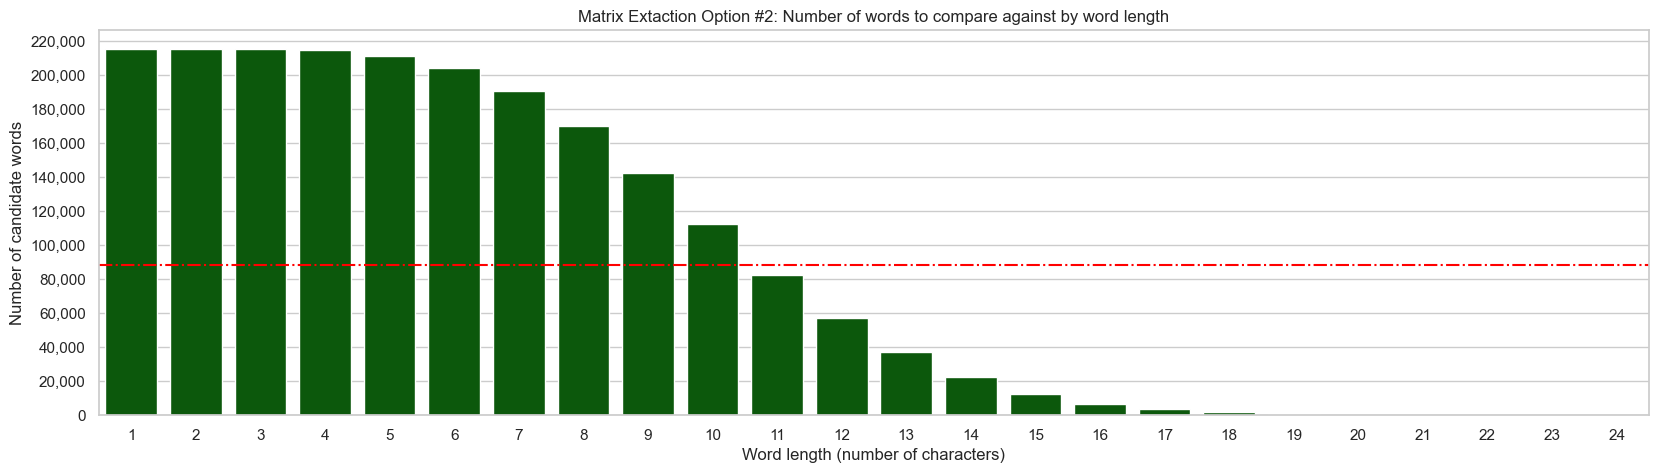

In [11]:
sns.set_theme(style = "whitegrid")
f, ax = plt.subplots(figsize = (20, 5))
my_plot = sns.barplot(df_agg, x="n_chars", y="me_02_n_char_lookup",
                      color='darkgreen')

y_tick_labels = list(range(0, 220001, 20000))
y_tick_labels_formatted = ['{:,}'.format(ytl) for ytl in y_tick_labels]   

my_plot.set_yticks(ticks = y_tick_labels)
my_plot.set_yticklabels(labels = y_tick_labels_formatted, rotation=0)

plt.axhline(y=df_agg['me_02_n_char_lookup'].mean(), color='red', linestyle='dashdot')

#ax.bar_label(ax.containers[0], fontsize=10)
plt.title(label = "Matrix Extaction Option #2: Number of words to compare against by word length")
plt.xlabel(xlabel = 'Word length (number of characters)')
plt.ylabel(ylabel = "Number of candidate words")
output_file_name = '..\\graphics\\meo_2_ss.png'
output_file_name = os.path.normpath(output_file_name)
print(output_file_name)
my_plot.get_figure().savefig(fname = output_file_name)



# MATRIX EXTRACTION OPTION 3

## Matrix Extraction Option #3: Number of comparisons to make by first letter

In [12]:
df_agg = wg_lu_df[['first_letter_id', 'me_03_first_letter_lookup']].drop_duplicates()
df_agg = df_agg.sort_values(by = 'first_letter_id')
df_agg['first_letter'] = list(string.ascii_lowercase)

In [13]:
df_agg.head()

,first_letter_id,me_03_first_letter_lookup,first_letter
0,0,133001,a
16513,1,35319,b
26876,2,80811,c
45684,3,56705,d
56000,4,145106,e


..\graphics\meo_3_ss.png


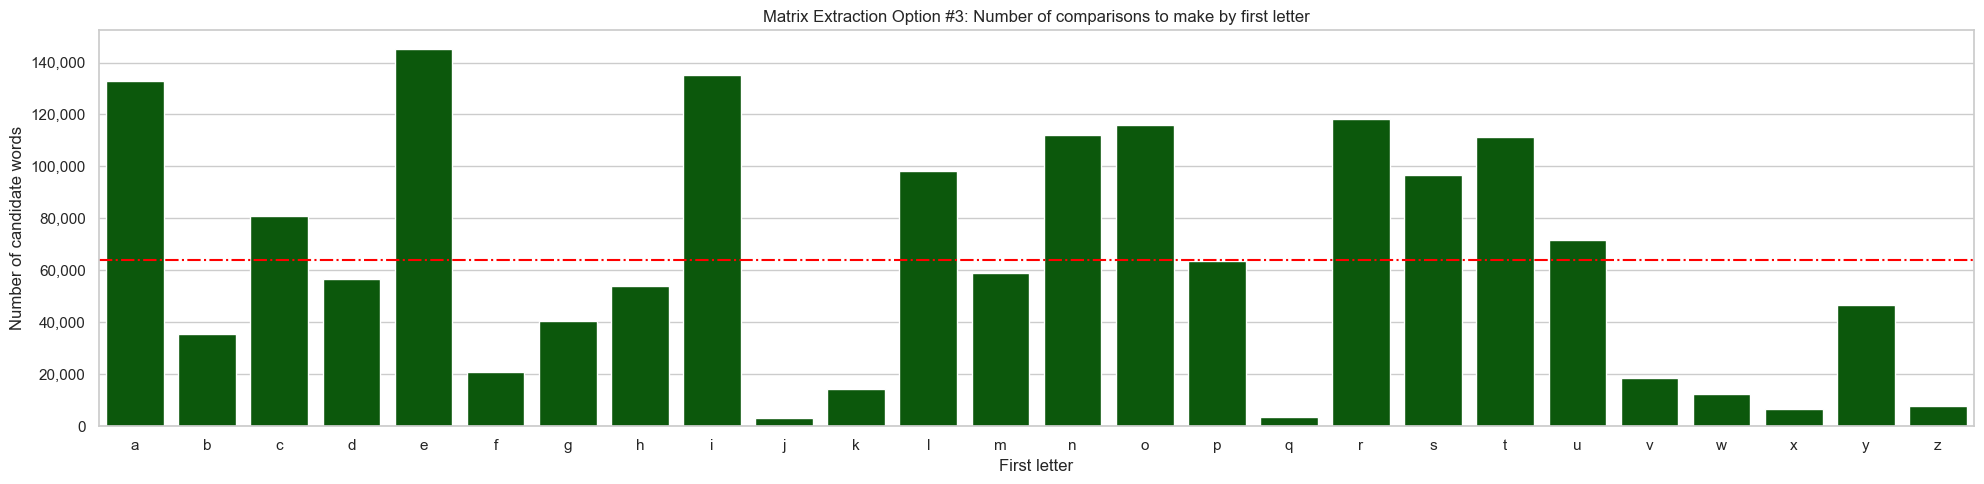

In [14]:
sns.set_theme(style = "whitegrid")
f, ax = plt.subplots(figsize = (20, 5))
my_plot = sns.barplot(df_agg, x="first_letter", y="me_03_first_letter_lookup",
                      color='darkgreen')

y_tick_labels = list(range(0, 140001, 20000))
y_tick_labels_formatted = ['{:,}'.format(ytl) for ytl in y_tick_labels]   

my_plot.set_yticks(ticks = y_tick_labels)
my_plot.set_yticklabels(labels = y_tick_labels_formatted, rotation=0)

#ax.bar_label(ax.containers[0], fontsize=10)
plt.axhline(y=df_agg['me_03_first_letter_lookup'].mean(), color='red', linestyle='dashdot')


plt.title(label = "Matrix Extraction Option #3: Number of comparisons to make by first letter")
plt.xlabel(xlabel = 'First letter')
plt.ylabel(ylabel = "Number of candidate words")
output_file_name = '..\\graphics\\meo_3_ss.png'
output_file_name = os.path.normpath(output_file_name)
print(output_file_name)
plt.tight_layout()
plt.show()
my_plot.get_figure().savefig(fname = output_file_name)



## Total Single Letter Count

In [15]:
[letter_rank_dict[ll] for ll in list('achiever')]

[3, 10, 15, 2, 1, 20, 1, 5]

..\graphics\meo_4_letter_rank.png


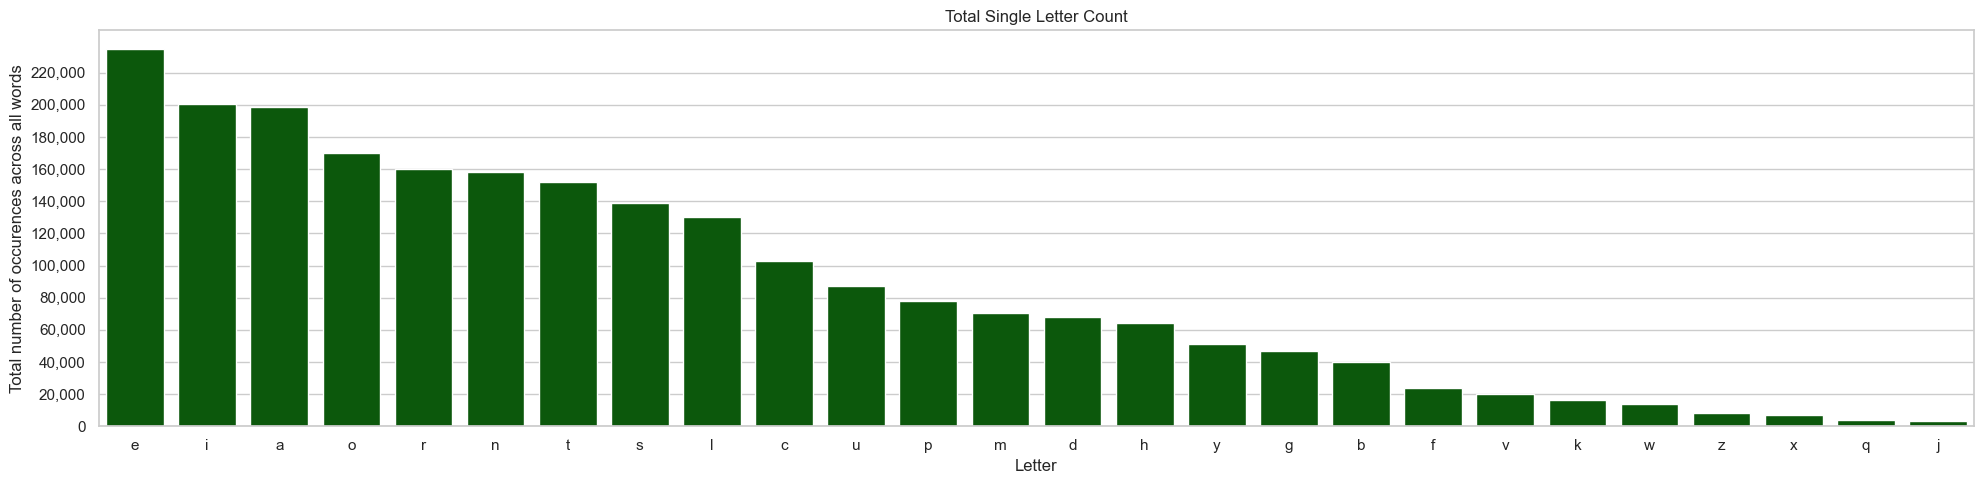

In [16]:
sns.set_theme(style = "whitegrid")

f, ax = plt.subplots(figsize = (20, 5))
my_plot = sns.barplot(lc_df, x="letter", y="total_letter_count",
                      color='darkgreen')

y_tick_labels = list(range(0, 220001, 20000))
y_tick_labels_formatted = ['{:,}'.format(ytl) for ytl in y_tick_labels]   

my_plot.set_yticks(ticks = y_tick_labels)
my_plot.set_yticklabels(labels = y_tick_labels_formatted, rotation=0)


#ax.bar_label(ax.containers[0], fontsize=10)
plt.title(label = "Total Single Letter Count")
plt.xlabel(xlabel = 'Letter')
plt.ylabel(ylabel = "Total number of occurences across all words")
output_file_name = '..\\graphics\\meo_4_letter_rank.png'
output_file_name = os.path.normpath(output_file_name)
print(output_file_name)
my_plot.get_figure().savefig(fname = output_file_name)
plt.tight_layout()
plt.show()



## Frequency of starting letter by least common letters

In [17]:
# build a dictionary mapping letter id to letter value
letter_dict = {l_pos:l for l_pos, l in enumerate(string.ascii_lowercase)}

In [18]:
wg_lu_df['first_letter'] = wg_lu_df['first_letter_id'].map(letter_dict)
wg_lu_df['single_letter'] = wg_lu_df['single_letter_id'].map(letter_dict)

In [19]:
wg_lu_df.head()

,word_id,word_group_id,n_chars,first_letter_id,single_letter_id,letter_selector_id,nc_ls_id,me_01_full_matrix_lookup,me_02_n_char_lookup,me_03_first_letter_lookup,me_04_single_letter_lookup,me_05_letter_selector_lookup,me_06_nc_ls_lookup,first_letter,single_letter
0,0,0,1,0,0,0,0,215842,215842,133001,133001,133001,133001,a,a
1,1,1,2,0,0,0,1,215842,215816,133001,133001,133001,133000,a,a
2,2,2,3,0,11,1081,2,215842,215717,133001,98258,65528,65527,a,l
3,3,3,5,0,11,1083,3,215842,211614,133001,98258,42754,42731,a,l
4,4,4,3,0,12,1114,4,215842,215717,133001,58800,38652,38651,a,m


In [20]:
wg_lu_df.shape

(215842, 15)

In [21]:
wg_lu_df_xtb = pd.crosstab(index = wg_lu_df['first_letter'], columns = wg_lu_df['single_letter'])
                           

In [22]:
wg_lu_df_xtb = wg_lu_df_xtb.fillna(0).round(0).astype(int)
wg_lu_df_xtb.head()

single_letter,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
first_letter,,,,,,,,,,,,,,,,,,,,,
a,4,1748,547,1384,0,712,2194,2057,0,120,...,214,20,208,112,516,869,348,517,1650,553
b,0,7049,0,0,0,473,0,0,0,73,...,77,0,0,0,0,276,751,127,0,401
c,0,1548,1544,1362,0,949,1771,2462,0,144,...,157,0,0,0,860,1196,584,320,2559,453
d,0,847,0,3303,0,689,1195,691,0,63,...,60,0,0,0,0,786,443,201,1154,484
e,0,515,201,519,1,244,966,874,0,49,...,263,6,76,27,136,452,158,1628,886,249


In [23]:
wg_lu_df_xtb.tail()

single_letter,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
first_letter,,,,,,,,,,,,,,,,,,,,,
v,0,0,0,0,0,0,0,0,0,10,...,22,0,0,0,0,2702,49,57,0,117
w,0,0,0,0,0,0,0,0,0,10,...,4,0,0,0,0,0,3355,33,0,70
x,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,361,0,0
y,0,21,0,0,0,18,61,0,0,11,...,3,0,0,0,0,17,77,2,212,14
z,0,0,0,0,0,0,0,0,0,2,...,5,0,0,0,0,0,0,17,0,864


In [24]:
col_sum = wg_lu_df_xtb.sum(axis = 1)

..\graphics\meo_4_first_letter_starting_letter.png


<Figure size 1920x1440 with 0 Axes>

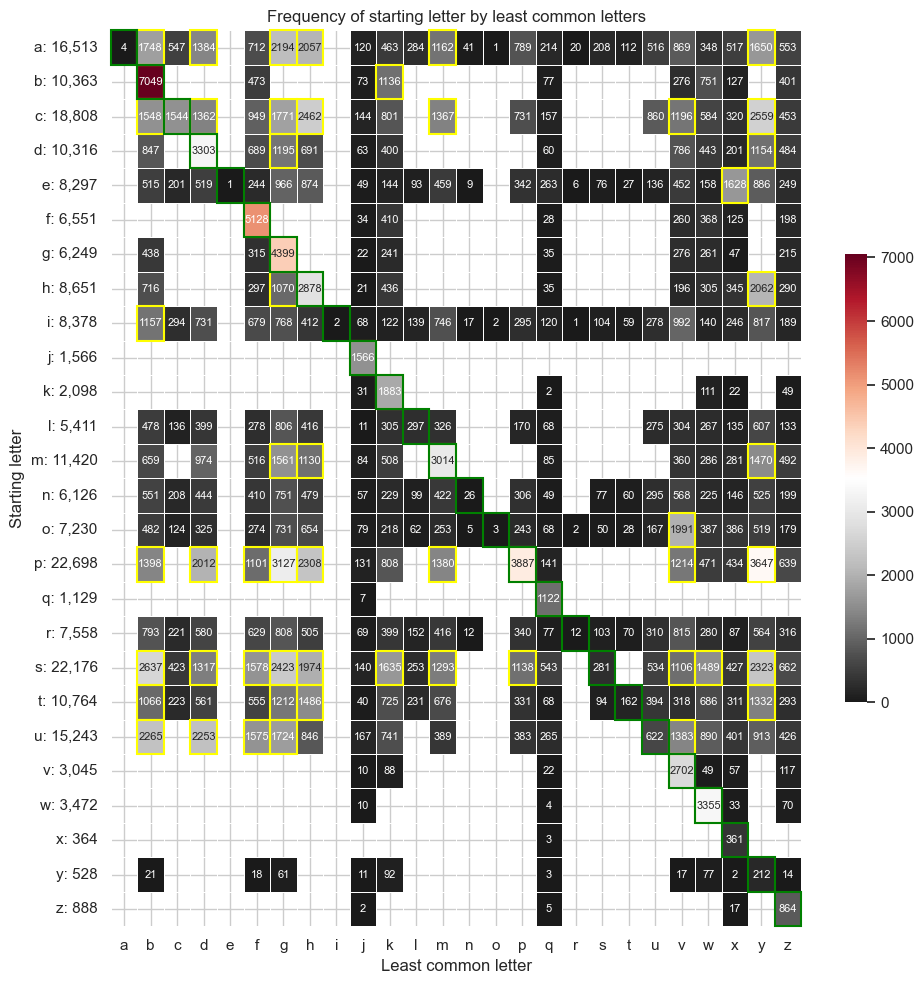

In [25]:
im_data = wg_lu_df_xtb.to_numpy()
#im_data = im_data * 100
im_data_mask = im_data == 0
sns.set_theme(style = "whitegrid")
plt.figure(dpi = 300)

norm = plt.Normalize(im_data.min(), im_data.max())

f, ax = plt.subplots(figsize = (10, 10))
my_plot = sns.heatmap(data = im_data, cmap = 'RdGy_r', norm = norm,
            square = False, linewidths=.5, cbar_kws={'shrink':.5},
            annot=True, fmt='.0f',
            annot_kws={"size": 8},
            mask = im_data_mask,
            xticklabels=wg_lu_df_xtb.columns)            

# now, let's highlight cells greater than 1000
cell_count = 0
for ii in range(0, 26):
    for jj in range(0, 26):
        if im_data[jj, ii] >= 1000:                        
            ax.add_patch(Rectangle((ii, jj), 1, 1, fill=False, edgecolor='yellow', lw=1.5, clip_on=False))
            cell_count += 1
        
        #if im_data[jj, ii] >= 5 and im_data[jj, ii] < 10:            
        #    ax.add_patch(Rectangle((ii, jj), 1, 1, fill=False, edgecolor='white', lw=1.5, clip_on=False))

# add shading around the diagonal
for ii in range(0, im_data.shape[1]):
    ax.add_patch(Rectangle((ii, ii), 1, 1, fill=False, edgecolor='green', lw=1.5, clip_on=False))


#my_plot.set_yticklabels(labels = wg_lu_df_xtb.columns, rotation=0)
y_text = [': '.join([ltr, "{:,}".format(cs)]) for ltr, cs in zip(wg_lu_df_xtb.columns, col_sum)]
my_plot.set_yticklabels(labels = y_text, rotation=0)

plt.title(label = "Frequency of starting letter by least common letters")
plt.xlabel(xlabel = 'Least common letter')
plt.ylabel(ylabel = "Starting letter")
output_file_name = '..\\graphics\\meo_4_first_letter_starting_letter.png'
output_file_name = os.path.normpath(output_file_name)
print(output_file_name)
my_plot.get_figure().savefig(fname = output_file_name)
plt.tight_layout()
plt.show()

In [26]:
# compute the differences between the matrix extraction techniques

In [27]:
# build the letter selector
wg_df['letter_selector'] = wg_df['letter_group_ranked'].str[:3]

In [28]:
# the number of groups by letter selector length
pd.Series(wg_df['letter_selector'].unique()).str.len().value_counts()

3    2250
2     111
1      26
Name: count, dtype: int64

In [29]:
wg_df.head()

,word,lcase,n_chars,first_letter,word_id,word_group_id,letter_group,letter_group_ranked,word_group_count,letter_selector
0,A,a,1,a,0,0,a,a,1,a
1,aa,aa,2,a,1,1,a,a,1,a
2,aal,aal,3,a,2,2,al,la,2,la
3,aalii,aalii,5,a,3,3,ail,lai,1,lai
4,aam,aam,3,a,4,4,am,ma,2,ma


In [30]:
# join the word group dataframes
left_col_names = ['first_letter', 'n_chars', 'word_group_id', 'letter_selector']
right_col_names = ['word_group_id', 'first_letter_id', 'letter_selector_id', 
                   'me_03_first_letter_lookup', 'me_04_single_letter_lookup',
                   'me_05_letter_selector_lookup', 'me_06_nc_ls_lookup']
c_wg_df = pd.merge(left = wg_df[left_col_names],
                   right = wg_lu_df[right_col_names])

In [31]:
# aggregate by first letter and the counts of lookups
group_by_cols = ['first_letter', 'me_03_first_letter_lookup',
       'me_04_single_letter_lookup', 'me_05_letter_selector_lookup',
       'me_06_nc_ls_lookup']
wg_agg_df = c_wg_df[group_by_cols].groupby(by = group_by_cols[:-4]).agg(
    first_letter_lookup = ('me_03_first_letter_lookup', 'sum'),
    single_letter_lookup = ('me_04_single_letter_lookup', 'sum'),
    letter_selector_lookup =('me_05_letter_selector_lookup', 'sum'),
    nc_ls_lookup = ('me_06_nc_ls_lookup', 'sum')).reset_index()

col_names = ['single_letter_lookup','letter_selector_lookup','nc_ls_lookup']
for cn in col_names:
    new_cn = cn + '_diff'
    wg_agg_df[new_cn] = ((wg_agg_df['first_letter_lookup'] - wg_agg_df[cn]) / wg_agg_df['first_letter_lookup']) * 100

# MATRIX EXTRACTION OPTION 4

## Average Percent Reduction Between First Letter Lookup and Single Letter Lookup

..\graphics\meo_4_letter_lookup_diff.png


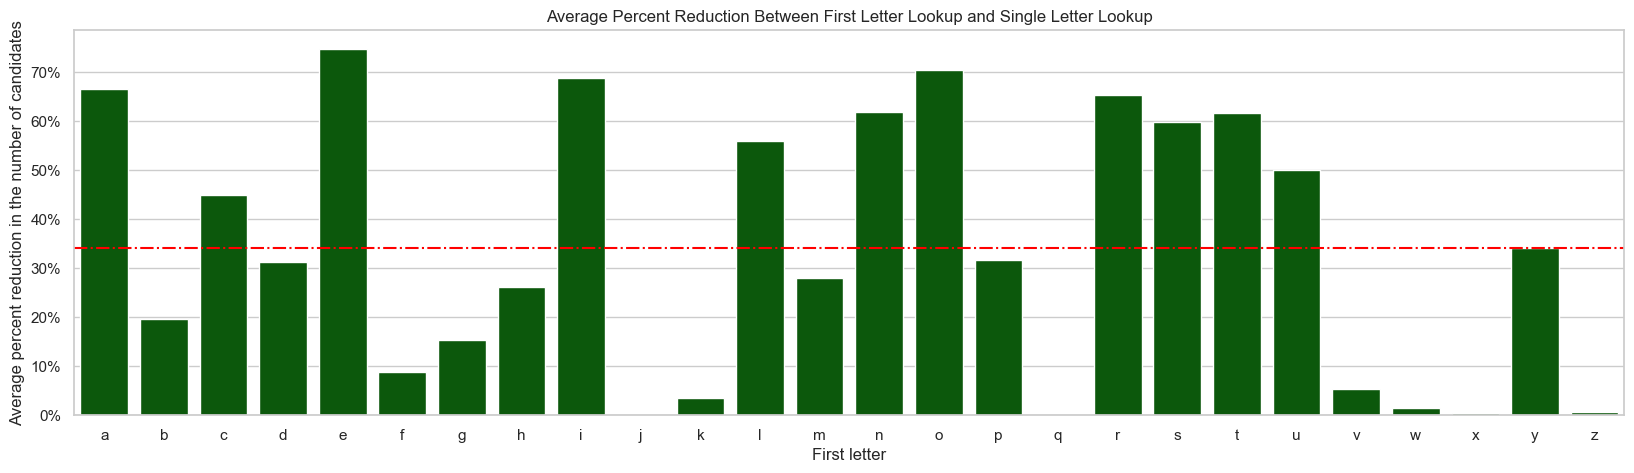

In [32]:
sns.set_theme(style = "whitegrid")
f, ax = plt.subplots(figsize = (20, 5))

my_plot = sns.barplot(data=wg_agg_df, x="first_letter", y="single_letter_lookup_diff",
                      color='darkgreen')


y_ticks = list(range(0, 80, 10))
y_tick_labels_formatted = ['{:.0%}'.format(ytl/100) for ytl in y_ticks]   

my_plot.set_yticks(ticks = y_ticks)
my_plot.set_yticklabels(labels = y_tick_labels_formatted, rotation=0)

plt.axhline(y=wg_agg_df['single_letter_lookup_diff'].mean(), color='red', linestyle='dashdot')

#ax.bar_label(ax.containers[0], fontsize=10)
plt.title(label = "Average Percent Reduction Between First Letter Lookup and Single Letter Lookup")
plt.xlabel(xlabel = 'First letter')
plt.ylabel(ylabel = "Average percent reduction in the number of candidates")
output_file_name = '..\\graphics\\meo_4_letter_lookup_diff.png'
output_file_name = os.path.normpath(output_file_name)
print(output_file_name)
my_plot.get_figure().savefig(fname = output_file_name)

# MATRIX EXTRACTION OPTION 5

In [33]:
wg_df.loc[wg_df['lcase'] == 'achiever', 'word_group_id']

1329    1329
Name: word_group_id, dtype: int64

In [34]:
c_wg_df.head()

,first_letter,n_chars,word_group_id,letter_selector,first_letter_id,letter_selector_id,me_03_first_letter_lookup,me_04_single_letter_lookup,me_05_letter_selector_lookup,me_06_nc_ls_lookup
0,a,1,0,a,0,0,133001,133001,133001,133001
1,a,2,1,a,0,0,133001,133001,133001,133000
2,a,3,2,la,0,1081,133001,98258,65528,65527
3,a,5,3,lai,0,1083,133001,98258,42754,42731
4,a,3,4,ma,0,1114,133001,58800,38652,38651


In [35]:
col_names = ['letter_selector_id', 'letter_selector', 'me_05_letter_selector_lookup', 'first_letter']
#ls_df = c_wg_df[col_names].drop_duplicates()
ls_df = c_wg_df[col_names].groupby(col_names[:-1]).agg( number_of_lookups = ('first_letter', 'size')).reset_index()

In [36]:
ls_df['ls_length'] = ls_df['letter_selector'].str.len()

In [37]:
ls_df.head()

,letter_selector_id,letter_selector,me_05_letter_selector_lookup,number_of_lookups,ls_length
0,0,a,133001,2,1
1,1,ae,84952,1,2
2,2,ai,82414,1,2
3,3,b,35319,1,1
4,4,ba,23469,4,2


In [38]:
ls_df.shape

(2387, 5)

In [39]:
ls_df['me_05_letter_selector_lookup'].describe()

count      2387.000000
mean       7444.399665
std       13775.994922
min           1.000000
25%         340.000000
50%        1665.000000
75%        8655.500000
max      145106.000000
Name: me_05_letter_selector_lookup, dtype: float64

In [40]:
ls_df.head()

,letter_selector_id,letter_selector,me_05_letter_selector_lookup,number_of_lookups,ls_length
0,0,a,133001,2,1
1,1,ae,84952,1,2
2,2,ai,82414,1,2
3,3,b,35319,1,1
4,4,ba,23469,4,2


In [41]:
# compute the log to make visualization more accessible
ls_df['me_05_letter_selector_lookup_log'] = np.log10(ls_df['me_05_letter_selector_lookup'])

## Number of letter-selector groups by number of words per letter-selector group

..\graphics\meo_5_letter_selector_group_size.png


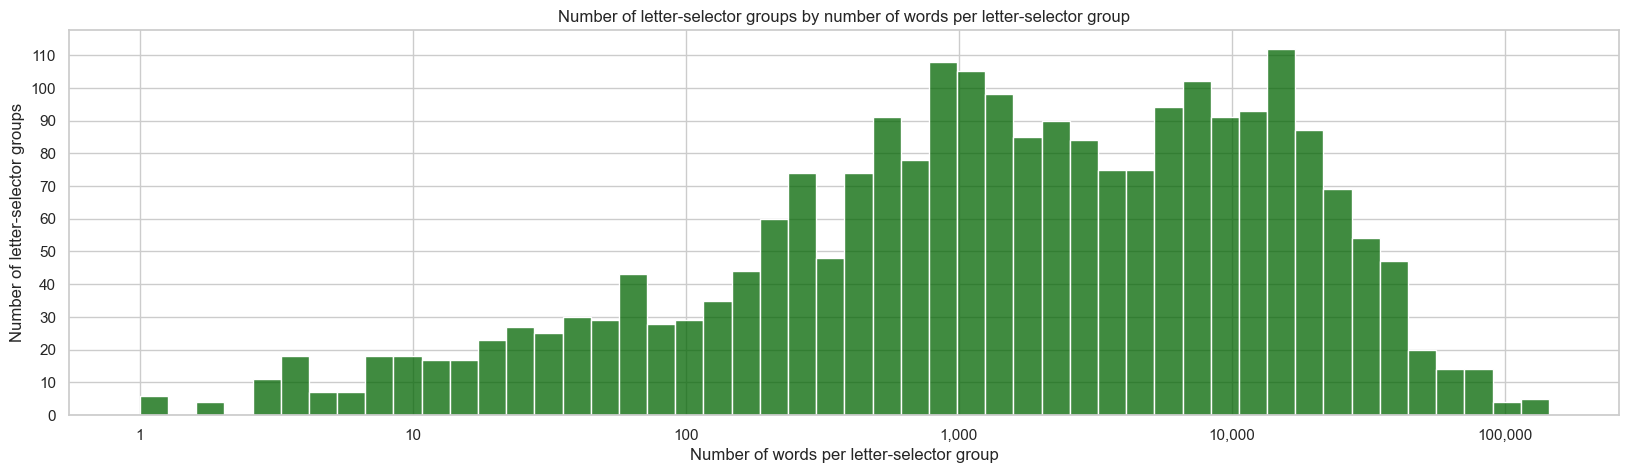

In [42]:
sns.set_theme(style = "whitegrid")
f, ax = plt.subplots(figsize = (20, 5))

my_plot = sns.histplot(data = ls_df, x = 'me_05_letter_selector_lookup_log',
                      color='darkgreen', bins = 50)

y_tick_labels = list(range(0, 111, 10))
y_tick_labels_formatted = ['{:,}'.format(ytl) for ytl in y_tick_labels]   

my_plot.set_yticks(ticks = y_tick_labels)
my_plot.set_yticklabels(labels = y_tick_labels_formatted, rotation=0)

x_ticks = list(range(0,6))
x_tick_labels_formatted = ['{:,}'.format(10**xtl) for xtl in x_ticks]   

my_plot.set_xticks(ticks = x_ticks)
my_plot.set_xticklabels(labels = x_tick_labels_formatted, rotation=0)


plt.title(label = "Number of letter-selector groups by number of words per letter-selector group")
plt.xlabel(xlabel = 'Number of words per letter-selector group')
plt.ylabel(ylabel = "Number of letter-selector groups")


output_file_name = '..\\graphics\\meo_5_letter_selector_group_size.png'
output_file_name = os.path.normpath(output_file_name)
print(output_file_name)
my_plot.get_figure().savefig(fname = output_file_name)

In [43]:
ls_df.head()

,letter_selector_id,letter_selector,me_05_letter_selector_lookup,number_of_lookups,ls_length,me_05_letter_selector_lookup_log
0,0,a,133001,2,1,5.123855
1,1,ae,84952,1,2,4.929174
2,2,ai,82414,1,2,4.916001
3,3,b,35319,1,1,4.548008
4,4,ba,23469,4,2,4.370495


## Number of actual comparisons by the size of the letter selector group

..\graphics\meo_5_comparisons_by_letter_selector_group_size.png


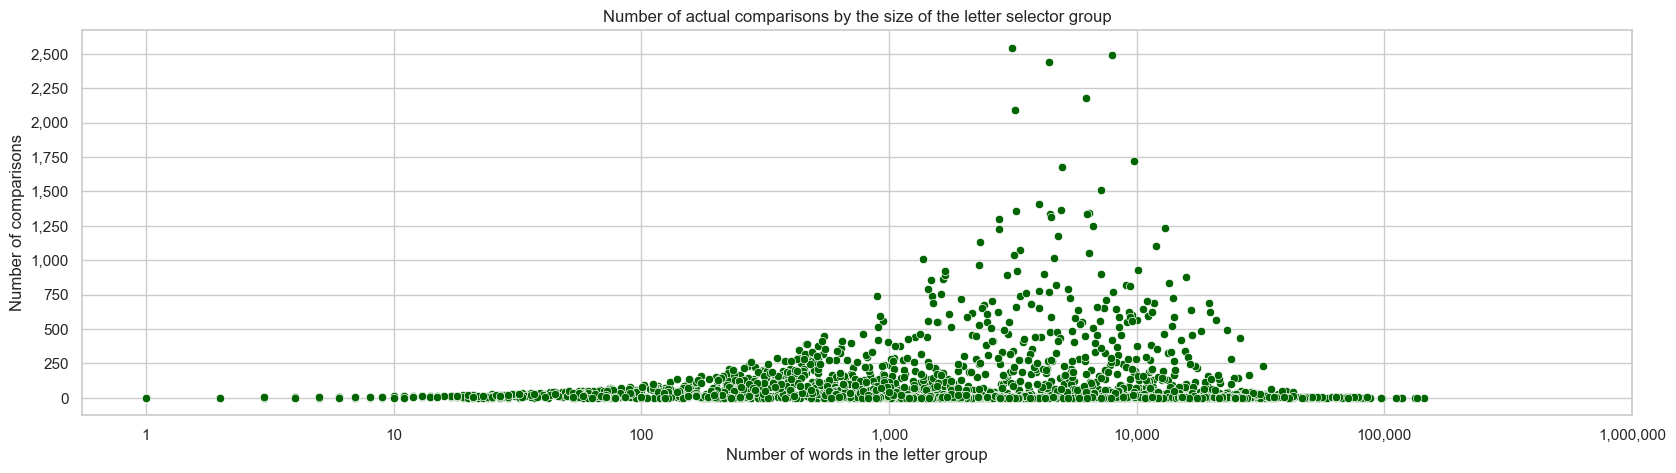

In [44]:
sns.set_theme(style = "whitegrid")
f, ax = plt.subplots(figsize = (20, 5))

# scatter plot of number of candidates by the actual candidates
my_plot = sns.scatterplot(data = ls_df, x = 'me_05_letter_selector_lookup_log',
                y = 'number_of_lookups', color='darkgreen')

y_tick_labels = list(range(0, 2501, 250))
y_tick_labels_formatted = ['{:,}'.format(ytl) for ytl in y_tick_labels]   

my_plot.set_yticks(ticks = y_tick_labels)
my_plot.set_yticklabels(labels = y_tick_labels_formatted, rotation=0)

x_ticks = list(range(0,7))
x_tick_labels_formatted = ['{:,}'.format(10**xtl) for xtl in x_ticks]   

my_plot.set_xticks(ticks = x_ticks)
my_plot.set_xticklabels(labels = x_tick_labels_formatted, rotation=0)


plt.title(label = "Number of actual comparisons by the size of the letter selector group")
plt.xlabel(xlabel = 'Number of words in the letter group')
plt.ylabel(ylabel = "Number of comparisons")

output_file_name = '..\\graphics\\meo_5_comparisons_by_letter_selector_group_size.png'
output_file_name = os.path.normpath(output_file_name)
print(output_file_name)
my_plot.get_figure().savefig(fname = output_file_name)

## Average Percent Reduction In Number of Candidate Words Between First Letter Lookup and Letter Group Lookup

..\graphics\meo_5_letter_selector_lookup_diff.png


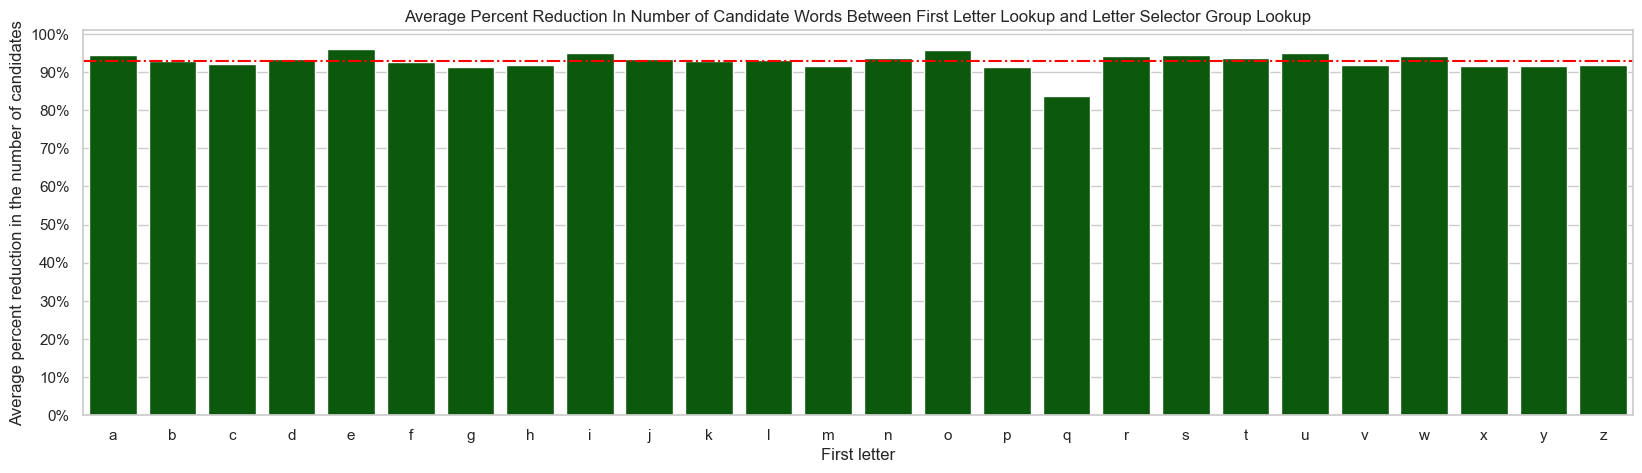

In [45]:
sns.set_theme(style = "whitegrid")
f, ax = plt.subplots(figsize = (20, 5))

my_plot = sns.barplot(data=wg_agg_df, x="first_letter", y="letter_selector_lookup_diff",
                      color='darkgreen')

y_ticks = list(range(0, 101, 10))
y_tick_labels_formatted = ['{:.0%}'.format(ytl/100) for ytl in y_ticks]   

my_plot.set_yticks(ticks = y_ticks)
my_plot.set_yticklabels(labels = y_tick_labels_formatted, rotation=0)

# Add a horizontal line at y=20
plt.axhline(y=wg_agg_df['letter_selector_lookup_diff'].mean(), color='red', linestyle='dashdot')

#ax.bar_label(ax.containers[0], fontsize=10)
plt.title(label = "Average Percent Reduction In Number of Candidate Words Between First Letter Lookup and Letter Selector Group Lookup")
plt.xlabel(xlabel = 'First letter')
plt.ylabel(ylabel = "Average percent reduction in the number of candidates")
output_file_name = '..\\graphics\\meo_5_letter_selector_lookup_diff.png'
output_file_name = os.path.normpath(output_file_name)
print(output_file_name)
my_plot.get_figure().savefig(fname = output_file_name)



# MATRIX EXTRACTION OPTION 6

In [46]:
c_wg_df.head()

,first_letter,n_chars,word_group_id,letter_selector,first_letter_id,letter_selector_id,me_03_first_letter_lookup,me_04_single_letter_lookup,me_05_letter_selector_lookup,me_06_nc_ls_lookup
0,a,1,0,a,0,0,133001,133001,133001,133001
1,a,2,1,a,0,0,133001,133001,133001,133000
2,a,3,2,la,0,1081,133001,98258,65528,65527
3,a,5,3,lai,0,1083,133001,98258,42754,42731
4,a,3,4,ma,0,1114,133001,58800,38652,38651


In [47]:
col_names = ['n_chars', 'letter_selector_id', 'letter_selector', 'me_06_nc_ls_lookup', 'first_letter']
#ls_df = c_wg_df[col_names].drop_duplicates()
ls_df = c_wg_df[col_names].groupby(col_names[:-1]).agg( number_of_lookups = ('first_letter', 'size')).reset_index()

In [48]:
ls_df['me_06_nc_ls_lookup_log'] = np.log10(ls_df['me_06_nc_ls_lookup'])

In [49]:
ls_df['me_06_nc_ls_lookup'].describe()

count     16101.000000
mean       4491.670890
std        9154.747352
min           1.000000
25%         126.000000
50%         789.000000
75%        4552.000000
max      145106.000000
Name: me_06_nc_ls_lookup, dtype: float64

## Number of letter-selector-n-character groups by number of words per letter-selector-n-character group

..\graphics\meo_6_nc_ls_group_size.png


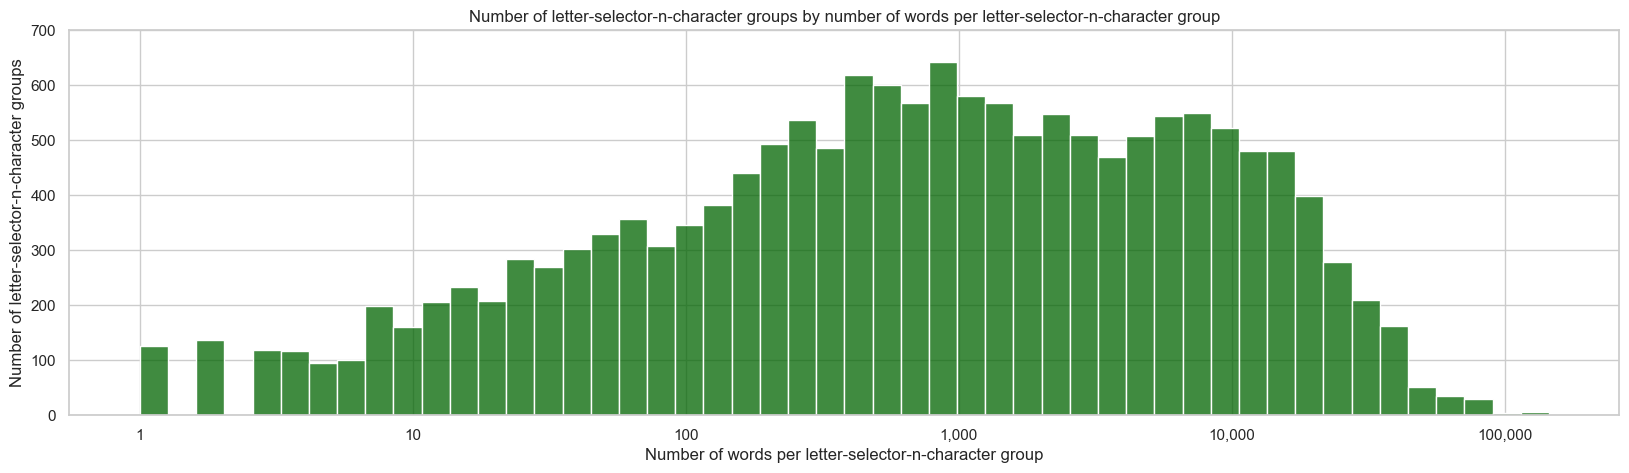

In [50]:
sns.set_theme(style = "whitegrid")
f, ax = plt.subplots(figsize = (20, 5))

my_plot = sns.histplot(data = ls_df, x = 'me_06_nc_ls_lookup_log',
                      color='darkgreen', bins = 50)

y_ticks = list(range(0, 701, 100))
y_tick_labels_formatted = ['{:,}'.format(ytl) for ytl in y_ticks]   

my_plot.set_yticks(ticks = y_ticks)
my_plot.set_yticklabels(labels = y_tick_labels_formatted, rotation=0)


plt.title(label = "Number of letter-selector-n-character groups by number of words per letter-selector-n-character group")
plt.xlabel(xlabel = 'Number of words per letter-selector-n-character group')
plt.ylabel(ylabel = "Number of letter-selector-n-character groups")

x_ticks = list(range(0,6))
x_tick_labels_formatted = ['{:,}'.format(10**xtl) for xtl in x_ticks]   

my_plot.set_xticks(ticks = x_ticks)
my_plot.set_xticklabels(labels = x_tick_labels_formatted, rotation=0)

output_file_name = '..\\graphics\\meo_6_nc_ls_group_size.png'
output_file_name = os.path.normpath(output_file_name)
print(output_file_name)
my_plot.get_figure().savefig(fname = output_file_name)

## Average Percent Reduction In Number of Candidate Words Between First Letter Lookup and the Combined Number Of Characters and Letter Group Lookup

..\graphics\meo_6_nc_ls_lookup_diff.png


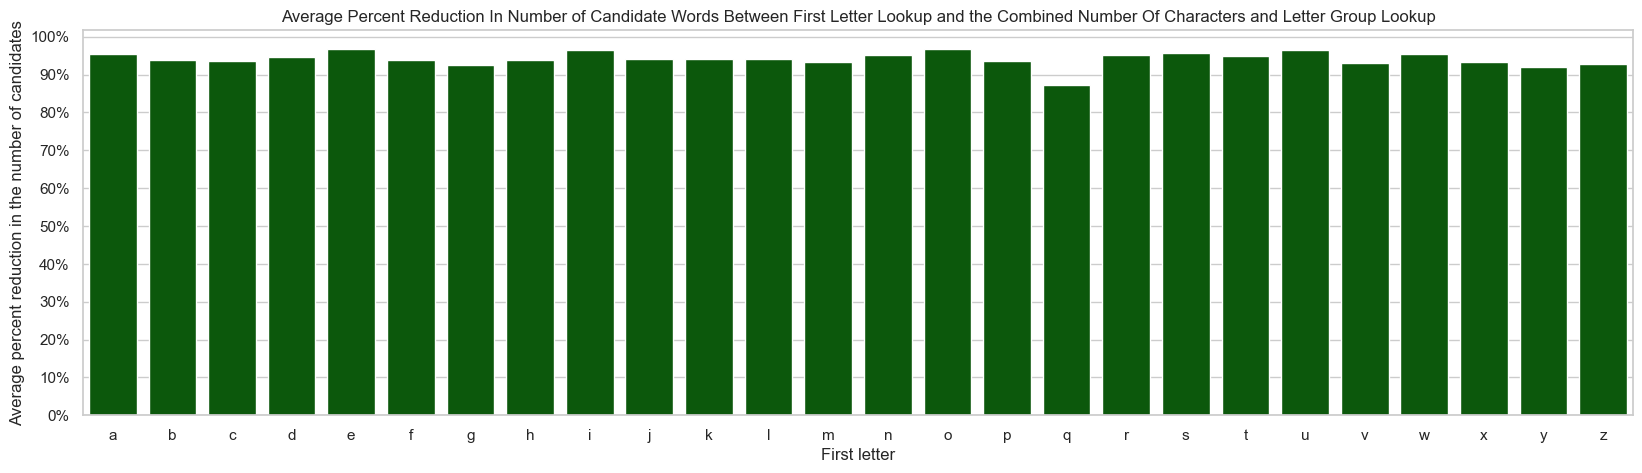

In [51]:
sns.set_theme(style = "whitegrid")
f, ax = plt.subplots(figsize = (20, 5))

my_plot = sns.barplot(data=wg_agg_df, x="first_letter", y="nc_ls_lookup_diff",
                      color='darkgreen')
#ax.bar_label(ax.containers[0], fontsize=10)


y_ticks = list(range(0, 101, 10))
y_tick_labels_formatted = ['{:.0%}'.format(ytl/100) for ytl in y_ticks]   

my_plot.set_yticks(ticks = y_ticks)
my_plot.set_yticklabels(labels = y_tick_labels_formatted, rotation=0)

plt.title(label = "Average Percent Reduction In Number of Candidate Words Between First Letter Lookup and the Combined Number Of Characters and Letter Group Lookup")
plt.xlabel(xlabel = 'First letter')
plt.ylabel(ylabel = "Average percent reduction in the number of candidates")
output_file_name = '..\\graphics\\meo_6_nc_ls_lookup_diff.png'
output_file_name = os.path.normpath(output_file_name)
print(output_file_name)
my_plot.get_figure().savefig(fname = output_file_name)



In [52]:
wg_agg_df.head()

,first_letter,first_letter_lookup,single_letter_lookup,letter_selector_lookup,nc_ls_lookup,single_letter_lookup_diff,letter_selector_lookup_diff,nc_ls_lookup_diff
0,a,2196245513,735961555,123072353,101884494,66.490014,94.396239,95.360970
1,b,366010797,293952235,26375678,22807798,19.687551,92.793743,93.768545
2,c,1519893288,836696574,119346318,96419559,44.950308,92.147717,93.656163
3,d,584968780,402583707,38770995,31106179,31.178599,93.372126,94.682421
4,e,1203944482,302954766,46057706,37627150,74.836484,96.174433,96.874677


In [53]:
c_wg_df.head()

,first_letter,n_chars,word_group_id,letter_selector,first_letter_id,letter_selector_id,me_03_first_letter_lookup,me_04_single_letter_lookup,me_05_letter_selector_lookup,me_06_nc_ls_lookup
0,a,1,0,a,0,0,133001,133001,133001,133001
1,a,2,1,a,0,0,133001,133001,133001,133000
2,a,3,2,la,0,1081,133001,98258,65528,65527
3,a,5,3,lai,0,1083,133001,98258,42754,42731
4,a,3,4,ma,0,1114,133001,58800,38652,38651


In [54]:
c_wg_df.shape

(215842, 10)

In [55]:
col_names = ['letter_selector', 'first_letter_id', 
              'letter_selector_id', 'first_letter']
#ls_df = c_wg_df[col_names].drop_duplicates()
ls_df = c_wg_df[col_names].groupby(col_names[:-1]).agg(
     number_of_lookups = ('first_letter', 'size')).reset_index()

In [56]:
ls_df.shape

(13009, 4)

# CONCLUSION: INDIVIDUAL TIMING

In [57]:
sql = 'select * from matrix_extraction_timing;'
met_df = query_db(sql = sql, db_path = rc.DB_PATH,
              db_name = rc.DB_NAME)

...query execution took: 0.01 seconds...


In [58]:
met_df = met_df.set_index(keys = 'Matrix Extraction')

In [59]:
met_df.head()

,Option 1,Option 2,Option 3,Option 4,Option 5,Option 6
Matrix Extraction,,,,,,
Option 1,1.000000,1.210802,1.633925,10.175997,116.442003,132.240622
Option 2,0.825899,1.000000,1.349457,8.404347,96.169356,109.217423
Option 3,0.612023,0.741039,1.000000,6.227948,71.265227,80.934351
Option 4,0.098270,0.118986,0.160567,1.000000,11.442811,12.995349
Option 5,0.008588,0.010398,0.014032,0.087391,1.000000,1.135678


## Ratio of matrix extraction times for the word 'achiever

..\graphics\meo_all_comp_times.png


<Figure size 1920x1440 with 0 Axes>

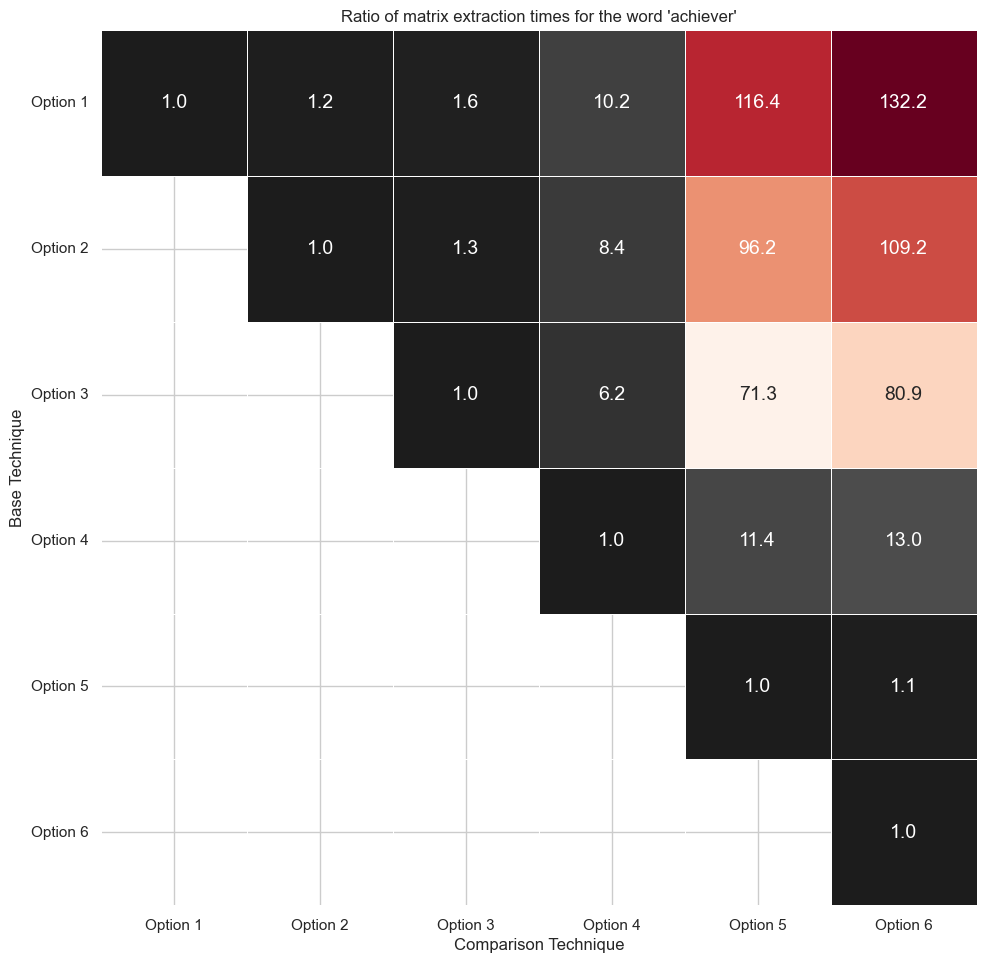

In [60]:
# make another heatmap
im_data = met_df.to_numpy()
im_data_mask = im_data < 1

sns.set_theme(style = "whitegrid")
plt.figure(dpi = 300)

f, ax = plt.subplots(figsize = (10, 10))

norm = plt.Normalize(im_data.min(), im_data.max())

my_plot = sns.heatmap(data = im_data, cmap = 'RdGy_r', norm = norm,
            square = True, linewidths=.5, cbar = False,
            annot=True, fmt='.1f',
            annot_kws={"size": 14},
            mask = im_data_mask)            

my_plot.set_yticklabels(labels = met_df.columns, rotation=0)
my_plot.set_xticklabels(labels = met_df.columns, rotation=0)
plt.title(label = "Ratio of matrix extraction times for the word 'achiever'")
plt.xlabel(xlabel = 'Comparison Technique')
plt.ylabel(ylabel = "Base Technique")
output_file_name = '..\\graphics\\meo_all_comp_times.png'
output_file_name = os.path.normpath(output_file_name)
print(output_file_name)
my_plot.get_figure().savefig(fname = output_file_name)
plt.tight_layout()
plt.show()

## Overall issues of timing

In [61]:
# load several tables from sqlite to aid with visualization
df_list = []
base_sql = 'select * from words_me_{}'
for tn in range(1, 7):
    sql = base_sql.format(str(tn).zfill(2))
    print(sql)
    df = query_db(sql = sql, db_path = rc.DB_PATH, db_name = rc.DB_NAME)
    df_list.append(df)


select * from words_me_01
...query execution took: 1.43 seconds...
select * from words_me_02
...query execution took: 1.38 seconds...
select * from words_me_03
...query execution took: 1.22 seconds...
select * from words_me_04
...query execution took: 1.25 seconds...
select * from words_me_05
...query execution took: 1.61 seconds...
select * from words_me_06
...query execution took: 1.29 seconds...


In [62]:
t_df = pd.concat(df_list)

In [63]:
t_df.shape

(1295052, 5)

In [64]:
# let's aggregate by technique
t_df_agg = t_df[['matrix_extraction_option', 'n_seconds']].groupby(['matrix_extraction_option']).agg(tot_seconds = ('n_seconds', 'sum')).reset_index()

In [65]:
t_df_agg['n_minutes'] = t_df_agg['tot_seconds'] / 60
t_df_agg['n_hours'] = t_df_agg['n_minutes'] / 60

In [66]:
t_df_agg.head(10)

,matrix_extraction_option,tot_seconds,n_minutes,n_hours
0,1,5629.501899,93.825032,1.563751
1,2,2973.394238,49.556571,0.825943
2,3,2127.473382,35.457890,0.590965
3,4,928.906823,15.481780,0.258030
4,5,167.275060,2.787918,0.046465
5,6,218.805525,3.646759,0.060779


In [67]:
for my_row in t_df_agg.itertuples(index = False, name = None):    
    print('|' + '|'.join([str(round(x, 2)) for x in my_row]) + '|')


|1|5629.5|93.83|1.56|
|2|2973.39|49.56|0.83|
|3|2127.47|35.46|0.59|
|4|928.91|15.48|0.26|
|5|167.28|2.79|0.05|
|6|218.81|3.65|0.06|


In [68]:
t_df_agg.head()

,matrix_extraction_option,tot_seconds,n_minutes,n_hours
0,1,5629.501899,93.825032,1.563751
1,2,2973.394238,49.556571,0.825943
2,3,2127.473382,35.457890,0.590965
3,4,928.906823,15.481780,0.258030
4,5,167.275060,2.787918,0.046465


In [69]:
expanded_timing_list = []
for me_source, me_target in product(t_df_agg.values.tolist(), repeat=2):    
    #print(me_source, me_target)
    # let's unpack this
    me_source_option, me_source_timing = me_source[:2]
    me_target_option, me_target_timing = me_target[:2]

    me_source_option = 'Option ' + str(int(me_source_option))
    me_target_option =  'Option ' + str(int(me_target_option))
    
    me_source_target_timing_ratio = me_source_timing / me_target_timing
    
    # add to the list
    expanded_timing_list.append([me_source_option, me_target_option, me_source_timing, me_target_timing, me_source_target_timing_ratio])    

In [70]:
col_names = ['source', 'target', 'source_timing', 'target_timing', 'timing_ratio']
ex_t_df = pd.DataFrame(data= expanded_timing_list, columns=col_names)

In [71]:
ex_t_df.head()

,source,target,source_timing,target_timing,timing_ratio
0,Option 1,Option 1,5629.501899,5629.501899,1.000000
1,Option 1,Option 2,5629.501899,2973.394238,1.893291
2,Option 1,Option 3,5629.501899,2127.473382,2.646097
3,Option 1,Option 4,5629.501899,928.906823,6.060352
4,Option 1,Option 5,5629.501899,167.275060,33.654161


In [72]:
timing_table = ex_t_df.pivot_table(index = ['source'], columns = ['target'],
                           values =['timing_ratio']).reset_index(drop = False, names = 'Matrix Extraction')

In [73]:
timing_table.columns

MultiIndex([('Matrix Extraction',         ''),
            (     'timing_ratio', 'Option 1'),
            (     'timing_ratio', 'Option 2'),
            (     'timing_ratio', 'Option 3'),
            (     'timing_ratio', 'Option 4'),
            (     'timing_ratio', 'Option 5'),
            (     'timing_ratio', 'Option 6')],
           names=[None, 'target'])

In [74]:
# use a list comprehension to clean up the column names
col_names = [''.join(cn).replace('timing_ratio', '') for cn in timing_table.columns.tolist()]

In [75]:
timing_table.columns = col_names

In [76]:
timing_table = timing_table.set_index('Matrix Extraction')

In [77]:

timing_table.head(n=10)

,Option 1,Option 2,Option 3,Option 4,Option 5,Option 6
Matrix Extraction,,,,,,
Option 1,1.000000,1.893291,2.646097,6.060352,33.654161,25.728335
Option 2,0.528181,1.000000,1.397618,3.200961,17.775478,13.589210
Option 3,0.377915,0.715503,1.000000,2.290298,12.718413,9.723125
Option 4,0.165007,0.312406,0.436624,1.000000,5.553170,4.245354
Option 5,0.029714,0.056257,0.078626,0.180077,1.000000,0.764492
Option 6,0.038868,0.073588,0.102848,0.235552,1.308058,1.000000


..\graphics\meo_all_comp_times_all_words.png


<Figure size 1920x1440 with 0 Axes>

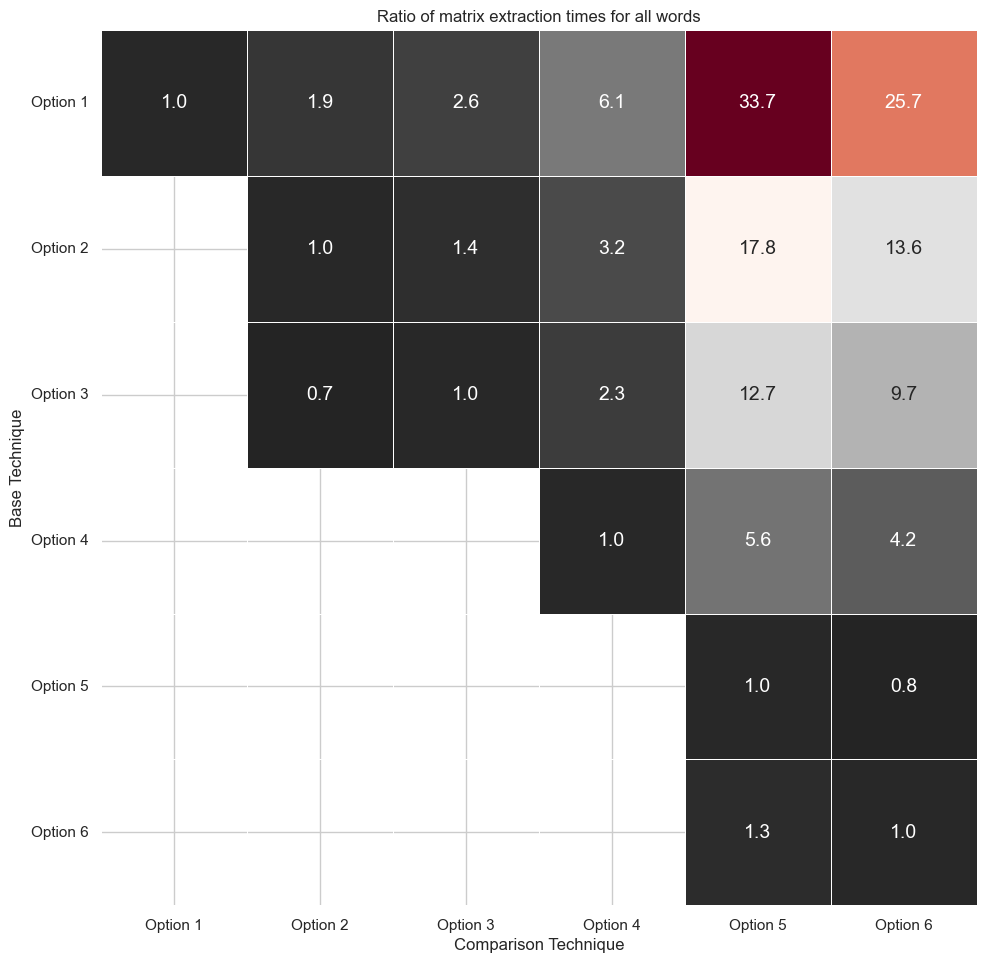

In [78]:
# make another heatmap
im_data = timing_table.to_numpy()
im_data_mask = im_data < .7

sns.set_theme(style = "whitegrid")
plt.figure(dpi = 300)

f, ax = plt.subplots(figsize = (10, 10))

norm = plt.Normalize(im_data.min(), im_data.max())

my_plot = sns.heatmap(data = im_data, cmap = 'RdGy_r', norm = norm,
            square = True, linewidths=.5, cbar = False,
            annot=True, fmt='.1f',
            annot_kws={"size": 14},
            mask = im_data_mask)            

my_plot.set_yticklabels(labels = met_df.columns, rotation=0)
my_plot.set_xticklabels(labels = met_df.columns, rotation=0)
plt.title(label = "Ratio of matrix extraction times for all words")
plt.xlabel(xlabel = 'Comparison Technique')
plt.ylabel(ylabel = "Base Technique")
output_file_name = '..\\graphics\\meo_all_comp_times_all_words.png'
output_file_name = os.path.normpath(output_file_name)
print(output_file_name)
my_plot.get_figure().savefig(fname = output_file_name)
plt.tight_layout()
plt.show()

In [79]:
# graphics to make:
# total time for all words
# average search space counts and ratios

In [80]:
value_cols = ['me_01_full_matrix_lookup',
           'me_02_n_char_lookup',
           'me_03_first_letter_lookup',
           'me_04_single_letter_lookup',
           'me_05_letter_selector_lookup',
           'me_06_nc_ls_lookup']

wg_lu_melt = wg_lu_df.melt(id_vars = ['word_group_id'],value_vars = value_cols,
                           var_name = 'matrix_extraction',
                           value_name='candidate words')

In [81]:
wg_lu_melt['matrix_extraction'] = wg_lu_melt['matrix_extraction'].str[3:5]

In [82]:
# before we can make a box plot, we need to melt the dataframe
testo = wg_lu_melt.loc[wg_lu_melt['matrix_extraction'] != '01', :]

..\graphics\meo_all_box_plot_distribution.png


<Figure size 1920x1440 with 0 Axes>

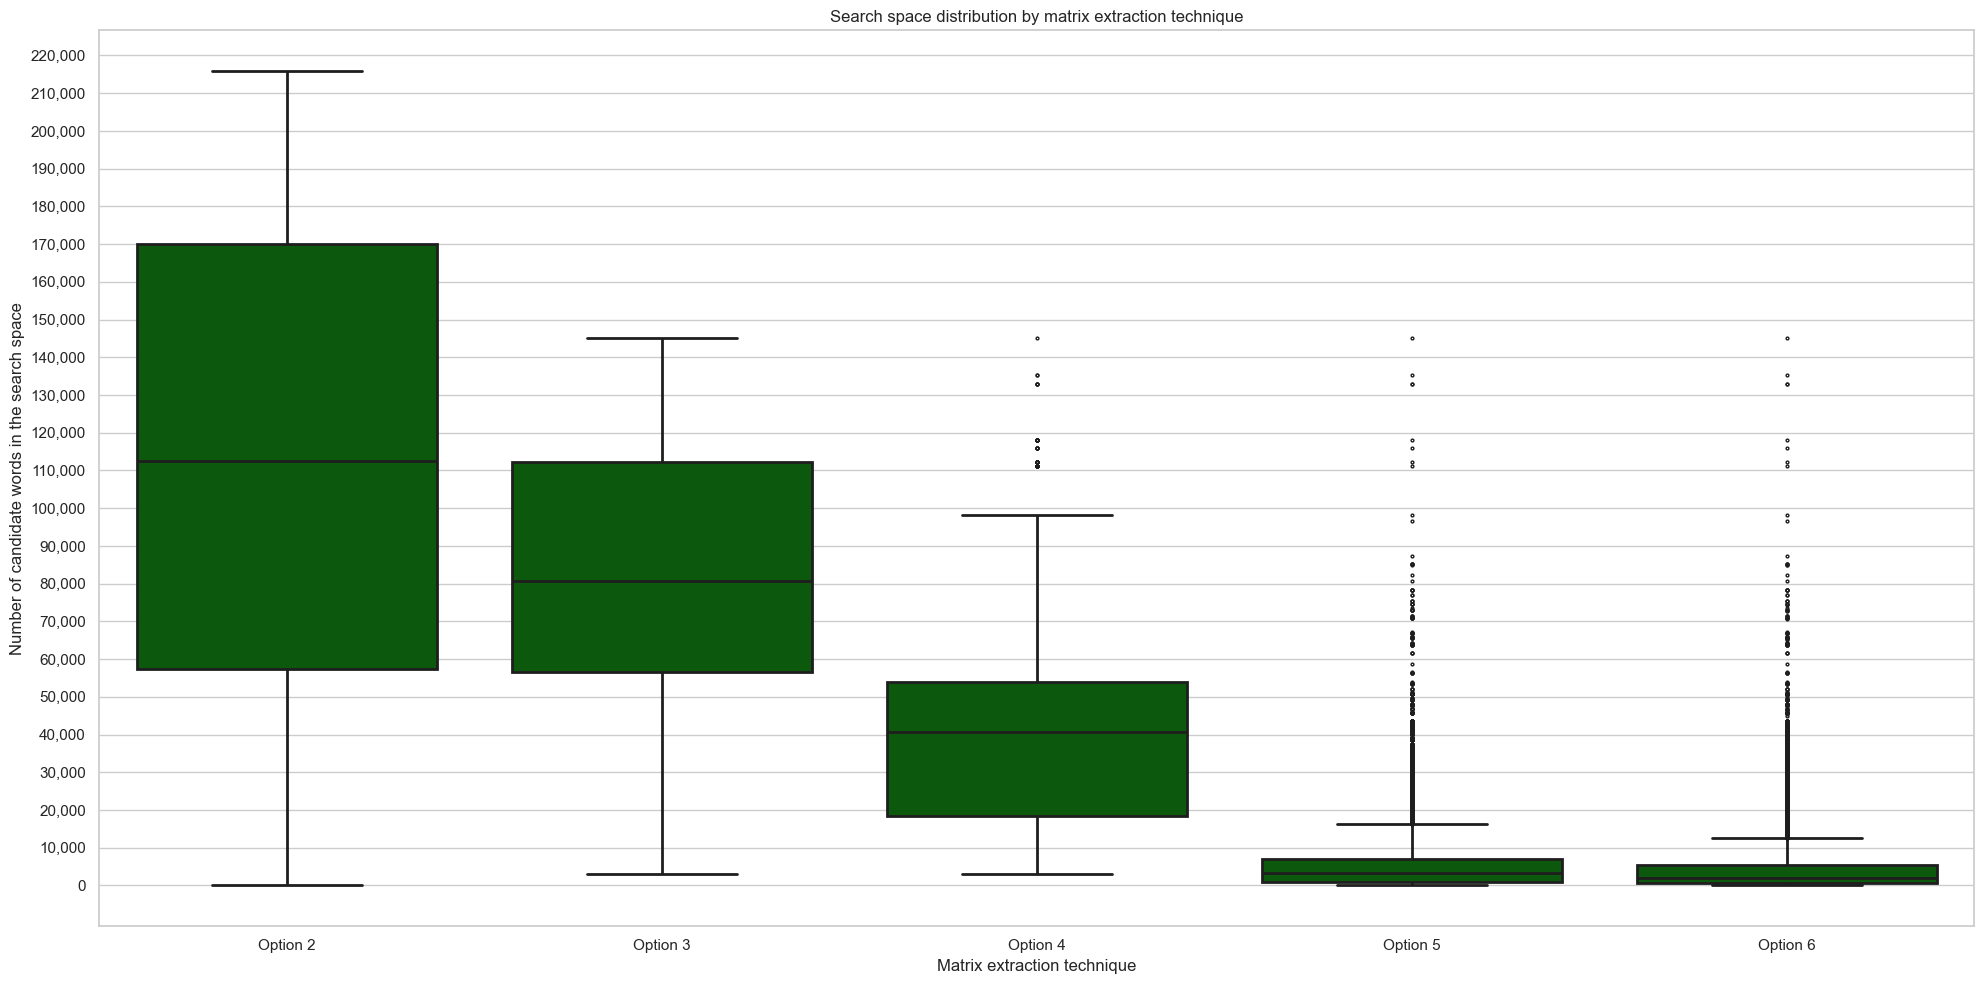

In [83]:
sns.set_theme(style = "whitegrid")
plt.figure(dpi = 300)

f, ax = plt.subplots(figsize = (20, 10))
my_plot = sns.boxplot(data = testo, x = 'matrix_extraction', 
                      y = 'candidate words', linewidth = 2,
                      fliersize=2, color = 'darkgreen')

y_tick_labels = list(range(0, 220001, 10000))
y_tick_labels_formatted = ['{:,}'.format(ytl) for ytl in y_tick_labels]   

my_plot.set_yticks(ticks = y_tick_labels)
my_plot.set_yticklabels(labels = y_tick_labels_formatted, rotation=0)

x_ticks = range(0, testo['matrix_extraction'].unique().shape[0])
x_tick_labels = ['Option ' + str(ii) for ii in range(2, 7)]

my_plot.set_xticks(ticks = x_ticks)
my_plot.set_xticklabels(labels = x_tick_labels, rotation=0)
plt.title(label = "Search space distribution by matrix extraction technique")
plt.xlabel(xlabel = 'Matrix extraction technique')
plt.ylabel(ylabel = 'Number of candidate words in the search space')
output_file_name = '..\\graphics\\meo_all_box_plot_distribution.png'
output_file_name = os.path.normpath(output_file_name)
print(output_file_name)
my_plot.get_figure().savefig(fname = output_file_name)
plt.tight_layout()
plt.show()
